In [1]:
from bs4 import BeautifulSoup
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import re
import pickle

session = requests.Session()
retry = Retry(connect=3, backoff_factor=5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)

In [2]:
#Get's homepage of various websites to easily grab articles, probably will have to add searches to get enough 
#data for accurate results

#Fox News and CNN currently throw error when visiting, returning 0 article results, other sites work just fine
websites= ["https://www.cnn.com/politics", "https://www.cnn.com/opinions", "https://www.foxnews.com/politics", "https://www.foxnews.com/opinion", "https://www.washingtonpost.com/politics", "https://www.washingtonpost.com/opinions/", "https://www.cbsnews.com/us", "https://www.nbcnews.com/politics"]
homepages = []
try:
    for site in websites:
        homepages.append(session.get(site))
except Exception:
    print(Exception)
print(homepages)

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]


In [3]:
def articlefinder():
    pages = []
    #Regex for finding keywords 
    pattern = re.compile(r'^((http|https).*(trump|biden|flordia|desantis|president|pelosi|liberal|conservative|transgender|shooting|guns|covid|Coronavirus|crisis).*$)', re.IGNORECASE)
    articles_by_site = set()
    web_devs_are_aholes_pattern = re.compile(r'^(.*(/opinions?/fox|/politics/).*(trump|biden|flordia|desantis|president|pelosi|liberal|conservative|transgender|shooting|guns|covid|Coronavirus|crisis).*$)', re.IGNORECASE)
    
    
    #Preparing to mine homepages
    for page in homepages:
        articles = set()
        soup = BeautifulSoup(page.text, "html5lib")
        
        #Grabbing all articles to being search 
        for article in soup.find_all("a"):
            curr_art = article.get("href")
            #Check if article has keyword, if yes put in set
            if(re.search(pattern, str(curr_art)) and not re.search("/video/", str(curr_art))):
                articles.add(article.get("href"))
            elif (re.search(web_devs_are_aholes_pattern, str(curr_art))):
                print(websites[homepages.index(page)].split("/")[2]+str(curr_art))
                articles.add("https://"+websites[homepages.index(page)].split("/")[2]+str(curr_art))
        articles_by_site.update(articles)
        

    return articles_by_site

print(len(articlefinder()))
print(articlefinder())

www.cnn.com/2023/04/17/politics/desantis-disney-takeover-florida/index.html
www.cnn.com/2023/04/17/politics/trump-election-lies-fox-news-defamation/index.html
www.cnn.com/2023/04/15/politics/power-players-presidents-sports-what-matters/index.html
www.cnn.com/2023/04/13/politics/donald-trump-criminal-civil-cases/index.html
www.cnn.com/2023/04/12/politics/bodycam-footage-police-louisville-shooting/index.html
www.cnn.com/2023/04/11/politics/guns-kentucky-tennessee-governor-what-matters/index.html
www.cnn.com/2023/04/11/politics/republican-silence-abortion-mass-shooting/index.html
www.cnn.com/videos/politics/2023/04/17/ron-desantis-disney-florida-state-takeover-contorno-nc-vpx.cnn
www.cnn.com/videos/politics/2023/04/17/ron-desantis-disney-florida-state-takeover-contorno-nc-vpx.cnn
www.cnn.com/2023/04/11/politics/donald-trump-reshape-gop-fault-lines/index.html
www.cnn.com/2023/04/11/politics/donald-trump-reshape-gop-fault-lines/index.html
www.cnn.com/2023/04/17/politics/fact-check-manhattan

In [4]:
#Pickle articles roughly between mining session to keep expansive data of articles for evaluation later
with open("saved_articles6.pkl", "wb") as f:
    pickle.dump(articlefinder(),f)

www.cnn.com/2023/04/17/politics/desantis-disney-takeover-florida/index.html
www.cnn.com/2023/04/17/politics/trump-election-lies-fox-news-defamation/index.html
www.cnn.com/2023/04/15/politics/power-players-presidents-sports-what-matters/index.html
www.cnn.com/2023/04/13/politics/donald-trump-criminal-civil-cases/index.html
www.cnn.com/2023/04/12/politics/bodycam-footage-police-louisville-shooting/index.html
www.cnn.com/2023/04/11/politics/guns-kentucky-tennessee-governor-what-matters/index.html
www.cnn.com/2023/04/11/politics/republican-silence-abortion-mass-shooting/index.html
www.cnn.com/videos/politics/2023/04/17/ron-desantis-disney-florida-state-takeover-contorno-nc-vpx.cnn
www.cnn.com/videos/politics/2023/04/17/ron-desantis-disney-florida-state-takeover-contorno-nc-vpx.cnn
www.cnn.com/2023/04/11/politics/donald-trump-reshape-gop-fault-lines/index.html
www.cnn.com/2023/04/11/politics/donald-trump-reshape-gop-fault-lines/index.html
www.cnn.com/2023/04/17/politics/fact-check-manhattan

In [5]:
#Check pickle file
with open("saved_articles.pkl", "rb") as f:
    pickle_test1 = pickle.load(f)
with open("saved_articles2.pkl", "rb") as g:
    pickle_test2 = pickle.load(g)
with open("saved_articles3.pkl", "rb") as h:
    pickle_test3 = pickle.load(h)
with open("saved_articles4.pkl", "rb") as h:
    pickle_test4 = pickle.load(h)
with open("saved_articles5.pkl", "rb") as h:
    pickle_test5 = pickle.load(h)
with open("saved_articles6.pkl", "rb") as h:
    pickle_test6= pickle.load(h)

In [6]:
checkset = set()
checkset.update(pickle_test1)
checkset.update(pickle_test2)
checkset.update(pickle_test3)
checkset.update(pickle_test4)
checkset.update(pickle_test5)
checkset.update(pickle_test6)
print(len(checkset))
print(checkset)

357
{'https://www.foxnews.com/opinion/american-businesses-under-attack-biden-bizarro-world', 'https://www.nbcnews.com/news/latino/biden-announces-plan-expand-health-coverage-daca-recipients-rcna79516', 'https://www.cbsnews.com/news/trump-faces-felony-charge-source-says/', 'https://www.washingtonpost.com/politics/joe-biden-46th-president/?itid=sf_politics_subnav', 'https://www.cnn.com/opinions/2022/10/30/opinions/biden-corvette-race-midterms-opinion-column-galant', 'https://www.cnn.com/politics/2023/03/30/politics/fact-check-biden-flamethrowers-machine-guns/index.html', 'https://www.foxnews.com/politics/bidens-ambitious-ev-plans-make-us-more-dependent-chinese-supply-chains', 'https://www.cnn.com/2023/04/12/politics/andy-beshear-louisville-shooting-cnntv/index.html', 'https://www.nbcnews.com/politics/2024-election/bidens-2024-campaign-starts-taking-shape-announcement-rcna78529', 'https://www.cbsnews.com/news/trump-lawyer-monthlong-delay-rape-trial-e-jean-caroll-joseph-tacopina/', 'https:

In [7]:
#Create dictionary to sort set by news sites
news_orgs = dict()
for article in checkset:
    article_split = article.split(".")
    if article_split[1] not in news_orgs.keys():
        news_orgs[article_split[1]] = {"Trump": [],
                                      "Biden": [],
                                      "Flordia": [],
                                       "Desantis": [],
                                       "President": [],
                                       "Pelosi": [],
                                       "liberal": [],
                                       "Conservative": [],
                                       "Transgender": [],
                                       "Shooting": [],
                                       "Guns": [],
                                       "Covid": [],
                                       "Coronavirus": [],
                                       "Crisis": []}
    for key in news_orgs[article_split[1]]:
        key_pattern = re.compile(r'^.*'+key+'.*$', re.IGNORECASE)
        if (re.search(key_pattern, str(article))):
            news_orgs[article_split[1]][key].append(article)
        
print(news_orgs)

{'foxnews': {'Trump': ['https://www.foxnews.com/opinion/opinion/after-donald-trumps-indictment-wave-goodbye-justice-system-say-hello', 'https://www.foxnews.com/politics/trump-deposed-thursday-new-york-ag-letitia-james-lawsuit', 'https://www.foxnews.com/politics/politics/trump-sues-michael-cohen-for-500-million', 'https://www.foxnews.com/politics/politics/trump-appeals-court-ruling-requiring-pence-testify-dojs-jan-6-probe-report', 'https://www.foxnews.com/category/person/donald-trump', 'https://www.foxnews.com/opinion/opinion/donald-trump-indictment-changes-2024-race-not-way-you-think', 'https://www.foxnews.com/opinion/opinion/prosecutorial-abuse-limited-trump-silver-lining'], 'Biden': ['https://www.foxnews.com/opinion/american-businesses-under-attack-biden-bizarro-world', 'https://www.foxnews.com/politics/bidens-ambitious-ev-plans-make-us-more-dependent-chinese-supply-chains', 'https://www.foxnews.com/politics/biden-refuses-join-dem-calls-sen-dianne-feinstein-resign', 'https://www.foxn

In [8]:
not_enough_info = []
for first_key in news_orgs:
    for second_key in news_orgs[first_key]:
        if len(news_orgs[first_key][second_key]) < 5:
            not_enough_info.append([first_key, second_key])
for trash in not_enough_info:
    news_orgs[trash[0]].pop(trash[1])

print(news_orgs)

{'foxnews': {'Trump': ['https://www.foxnews.com/opinion/opinion/after-donald-trumps-indictment-wave-goodbye-justice-system-say-hello', 'https://www.foxnews.com/politics/trump-deposed-thursday-new-york-ag-letitia-james-lawsuit', 'https://www.foxnews.com/politics/politics/trump-sues-michael-cohen-for-500-million', 'https://www.foxnews.com/politics/politics/trump-appeals-court-ruling-requiring-pence-testify-dojs-jan-6-probe-report', 'https://www.foxnews.com/category/person/donald-trump', 'https://www.foxnews.com/opinion/opinion/donald-trump-indictment-changes-2024-race-not-way-you-think', 'https://www.foxnews.com/opinion/opinion/prosecutorial-abuse-limited-trump-silver-lining'], 'Biden': ['https://www.foxnews.com/opinion/american-businesses-under-attack-biden-bizarro-world', 'https://www.foxnews.com/politics/bidens-ambitious-ev-plans-make-us-more-dependent-chinese-supply-chains', 'https://www.foxnews.com/politics/biden-refuses-join-dem-calls-sen-dianne-feinstein-resign', 'https://www.foxn

This cell below will go through every filtered webpage collected so far and run them through the spacy sentiment function. This will return a number based on how positive or negative the article is about a given subject, in this case the key for the array in the dictionary. For example, all articles from cnn are contained inside a value with the key cnn, and any article about Trump from cnn will be stored inside that dictionary and then inside another dictionary with the key Trump. Every article written about Trump by Cnn will be this key's value, and so on for every topic for every website. The reason we want the sentiment analysis is to see how, on average, each website is about a certain topic and be able to see if any bias shines through. We will do this by averaging out the average sentiment of each article for a given topic from a given website, to keep any biases site specific. Then, assigning it a color: red if it has a negative sentiment or blue if positive. Then, charting it on a bar chart using the absolute value of the average sentiment. The absolute value won't effect the value, just puts all bar charts on the same y axis so it is easier to judge.

This also takes an eternity to run, so debugging will be a slow proess but it seems to work consistently enough to be trustworthy.

In [9]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib as plt

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000
nlp.add_pipe("spacytextblob")

graphing_dict = dict()


print("Start")
for first_key in news_orgs:
    graphing_dict[first_key] = {}
    print(first_key)
    for second_key in news_orgs[first_key]:
        graphing_dict[first_key][second_key] = [[], []]
        print(second_key)
        for article in news_orgs[first_key][second_key]:
            curr_soup = session.get(article)
            curr_soup = BeautifulSoup(curr_soup.text, "html5lib")
            try :
                sent_text = nlp(curr_soup.get_text())
                sent_value = sent_text._.blob.sentiment
                print(sent_value)
                polarity, bias = zip(sent_value)
                #Index 0 is polarity, index 1 is bias
                graphing_dict[first_key][second_key][0].append(polarity)
                graphing_dict[first_key][second_key][1].append(bias)
            except Exception:
                print("Error, article not found, moving on.", article)
                pass        
                
print("Done")


Start
foxnews
Trump
Sentiment(polarity=0.03381818181818181, subjectivity=0.3893939393939394)
Sentiment(polarity=0.034477882670653756, subjectivity=0.3820110166495706)
Sentiment(polarity=0.03381818181818181, subjectivity=0.3893939393939394)
Sentiment(polarity=0.03381818181818181, subjectivity=0.3893939393939394)
Sentiment(polarity=0.017848000553479983, subjectivity=0.44869932198699314)
Sentiment(polarity=0.03381818181818181, subjectivity=0.3893939393939394)
Sentiment(polarity=0.03381818181818181, subjectivity=0.3893939393939394)
Biden
Sentiment(polarity=0.0750814367151001, subjectivity=0.41883974111696887)
Sentiment(polarity=0.059839819678529395, subjectivity=0.40876254569803)
Sentiment(polarity=0.060746717704845805, subjectivity=0.38264062155687784)
Sentiment(polarity=0.07497434415136278, subjectivity=0.4618816828444158)
Sentiment(polarity=0.041745462140199, subjectivity=0.34449877607772356)
Sentiment(polarity=0.03381818181818181, subjectivity=0.3893939393939394)
Sentiment(polarity=0.0

TypeError: dump() missing required argument 'file' (pos 2)

In [14]:
with open("sentiment.pkl", "wb") as f:
    test_dict = pickle.dump(graphing_dict,f)

In [104]:
for first_key in graphing_dict:
    for second_key in graphing_dict[first_key]:
        for article in graphing_dict[first_key][second_key]:
            for num in article:
                for second_num in num:
                    if (second_num == 0.03381818181818181):
                        article.remove(num)
                        print(second_num, "popped")
                    elif (second_num == 0.3893939393939394):
                        article.remove(num)
                        print(second_num, "popped")
print(graphing_dict["nbcnews"].keys())

dict_keys(['Trump', 'Biden', 'Desantis', 'President', 'Shooting'])


In [59]:
with open("sentiment.pkl", "wb") as f:
    test_dict = pickle.dump(graphing_dict,f)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.02616294161206687, -0.28458498435733265, -0.11005472625893306, -0.42465503241668634, -0.28079505268414656]


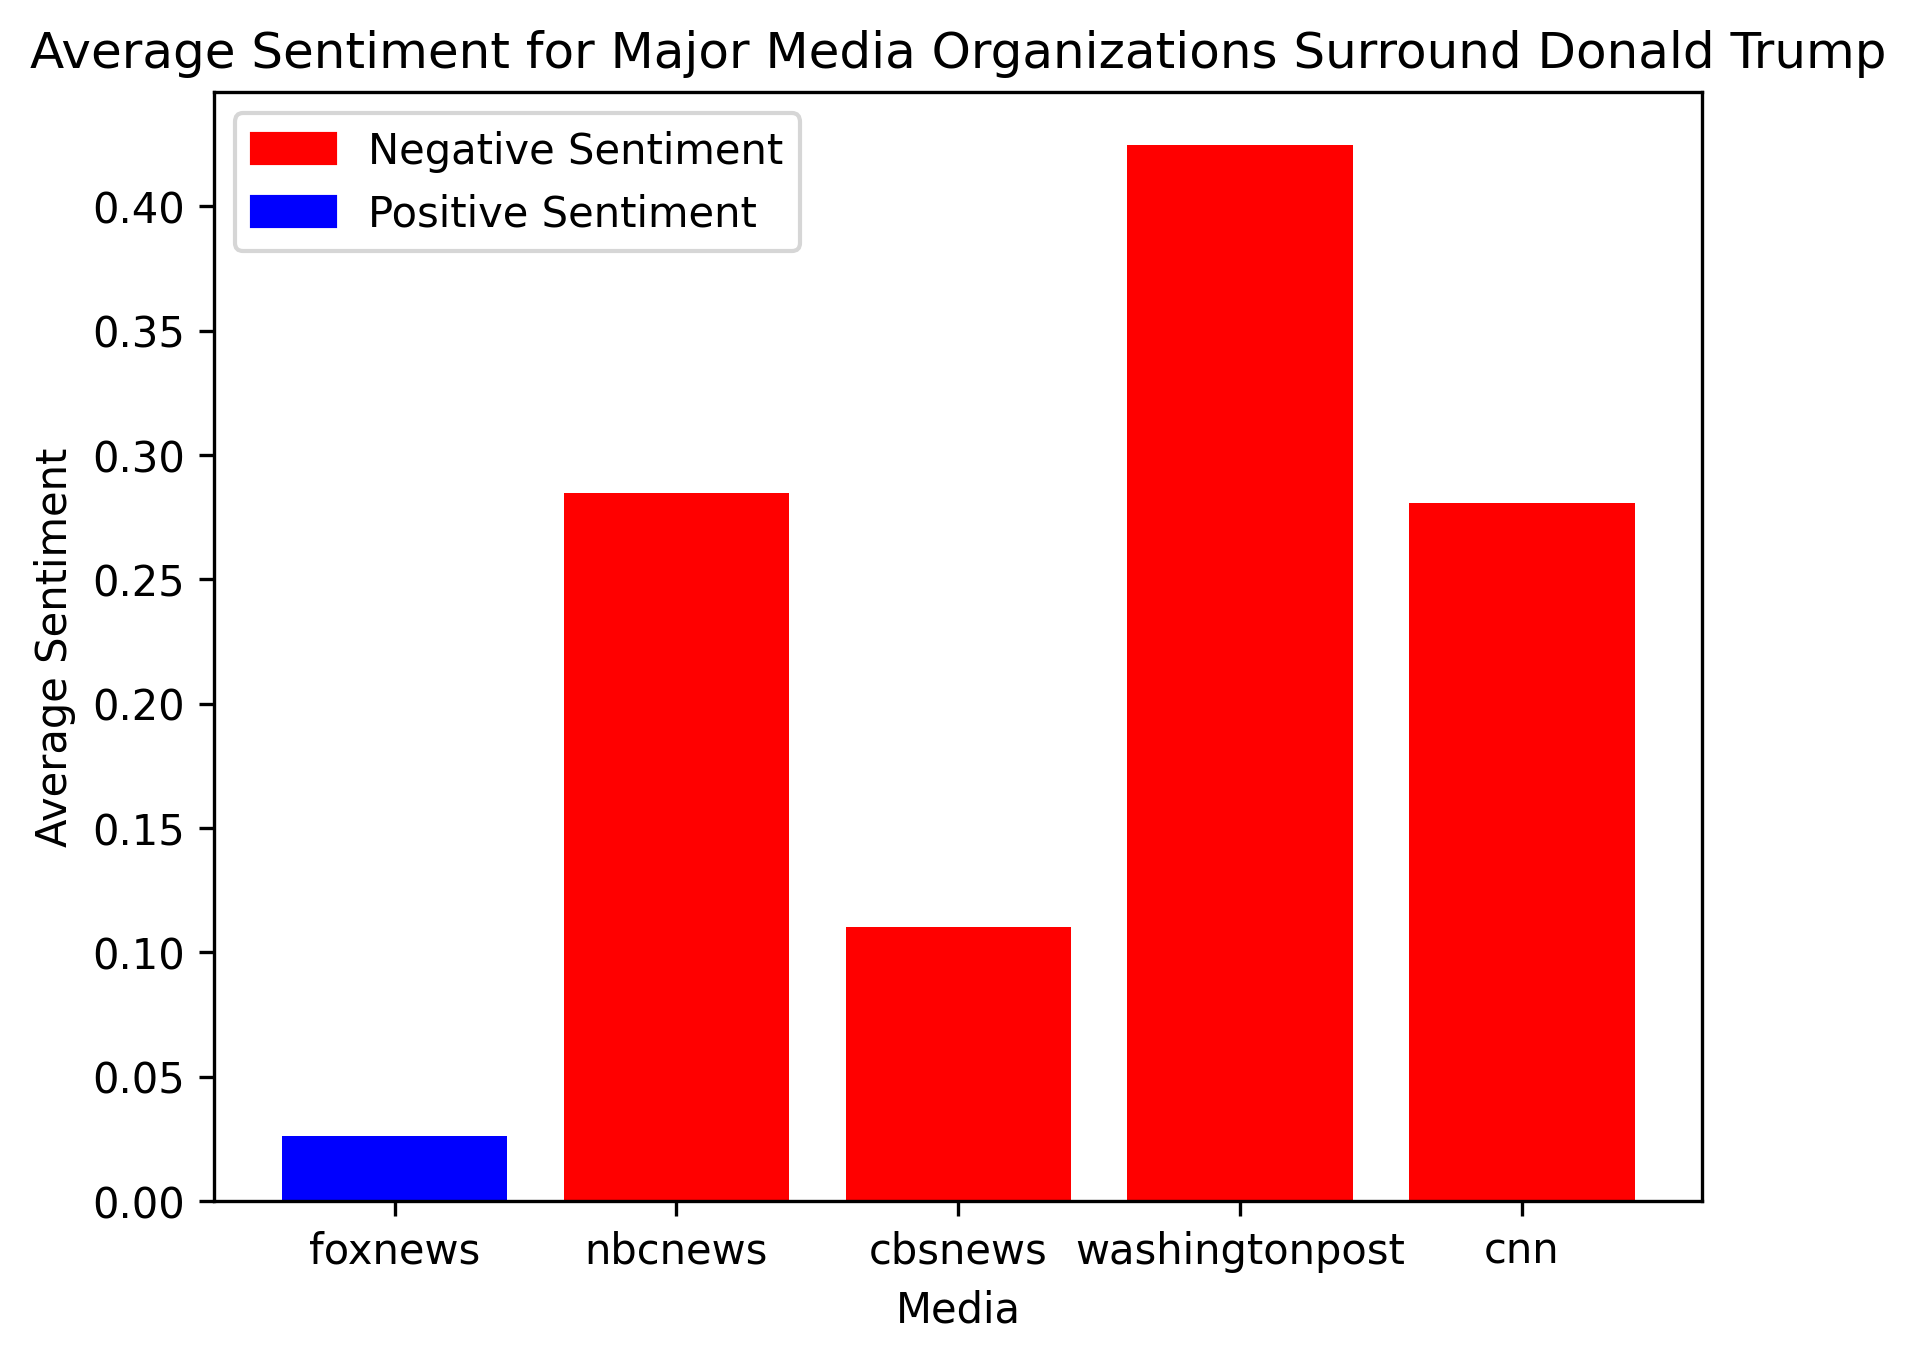

In [113]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

with open("sentiment.pkl", "rb") as f:
    test_dict = pickle.load(f)

def colorAlign(alist):
    colorList = []
    for num in alist:
        if (num >= 0):
            colorList.append("blue")
        else:
            colorList.append("red")
    return colorList

avgs = []
trueAvg = []
colors = []
for key in test_dict:
    avgs.append(test_dict[key]["Trump"][0])
    

for row in avgs:
    total = 0
    rowOrder = []
    for nextRow in row:
        for num in nextRow:
            rowOrder.append(num)
            total += num
    trueAvg.append(total / len(row))

    
print(trueAvg)
colors = colorAlign(trueAvg)

names = test_dict.keys()
polarity = []
for value in trueAvg:
    polarity.append(abs(value))

trump_sentiment = plt.bar(names, polarity, color = colors)
plt.rcParams['figure.dpi'] = 300
plt.legend(loc="upper right")
plt.title("Average Sentiment for Major Media Organizations Surround Donald Trump")
plt.xlabel("Media")
plt.ylabel("Average Sentiment")
blue_patch = mpatches.Patch(color='blue', label='Positive Sentiment')
red_patch = mpatches.Patch(color='red', label='Negative Sentiment')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig("trump-polarity.png")
plt.show()

15
16
10
16
36
[0.39392880462235347, 0.7127965452241367, 0.5927174579434118, 0.7240953269233478, 0.7103476717145067]


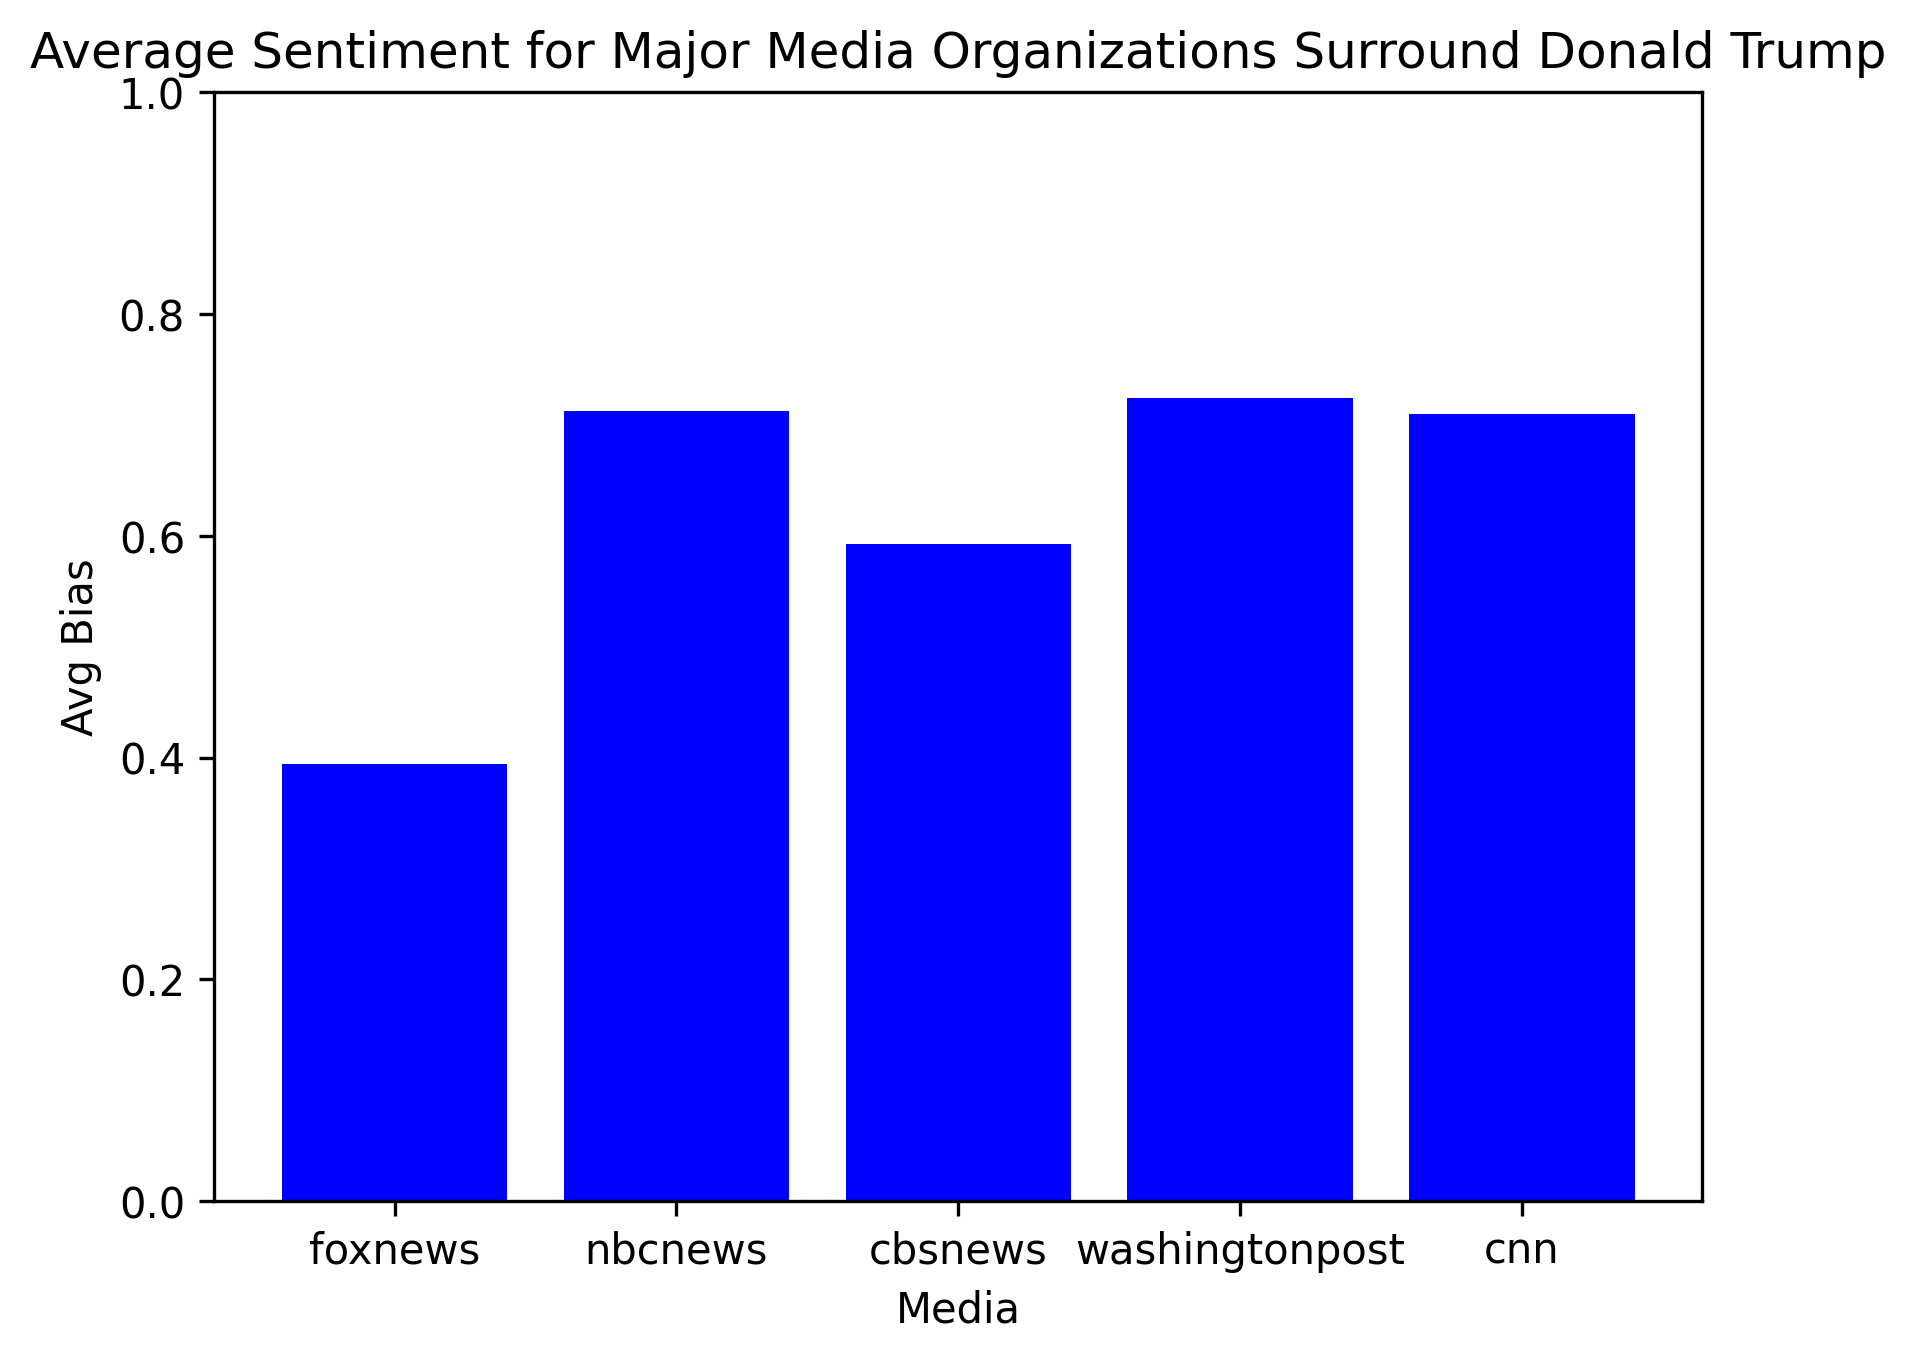

In [112]:
avgs = []
trueAvg = []
colors = []
for key in test_dict:
    avgs.append(test_dict[key]["Biden"][1])
    print(len(test_dict[key]["Biden"][1]))    

for row in avgs:
    total = 0
    rowOrder = []
    for nextRow in row:
        for num in nextRow:
            rowOrder.append(num)
            total += num
    trueAvg.append(total / len(row))

    
print(trueAvg)
colors = colorAlign(trueAvg)

names = test_dict.keys()
polarity = []
for value in trueAvg:
    polarity.append(value)

biden_sentiment = plt.bar(names, polarity, color = colors)
plt.rcParams['figure.dpi'] = 300
plt.title("Average Sentiment for Major Media Organizations Surround Donald Trump")
plt.xlabel("Media")
plt.ylabel("Avg Bias")
plt.ylim(0, 1)
plt.savefig("biden-bias.png")
plt.show()